In [1]:
from PIL import Image
import numpy as np

In [4]:
file = '../../data/raw/train_tier_1/kam/4e7c7f/4e7c7f.tif'

In [6]:
Image.MAX_IMAGE_PIXELS = 1713427900

In [7]:
im = Image.open(file)

In [8]:
x = np.array(im)

In [9]:
x.shape

(40024, 39270, 4)

In [14]:
def segment_image(image, width):
    size_x, size_y, _ = image.shape
    x = 0
    y = 0
    rv = []
    
    while x + width <= size_x:
        
        while y + width <= size_y:
            
            sub_image = image[x:x+width, y:y+width]
            rv.append(sub_image)
            y += width
    
        y = 0
        x += width
    
    return rv

In [41]:
images = segment_image(x, 512)

In [42]:
len(images)

5928

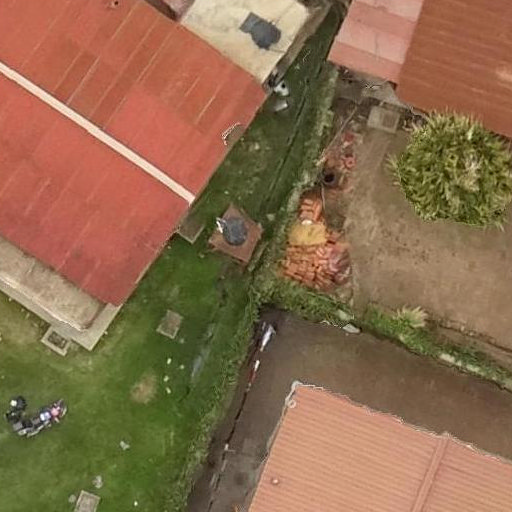

1

In [43]:
display(Image.fromarray(images[2000]), Image.LANCZOS)

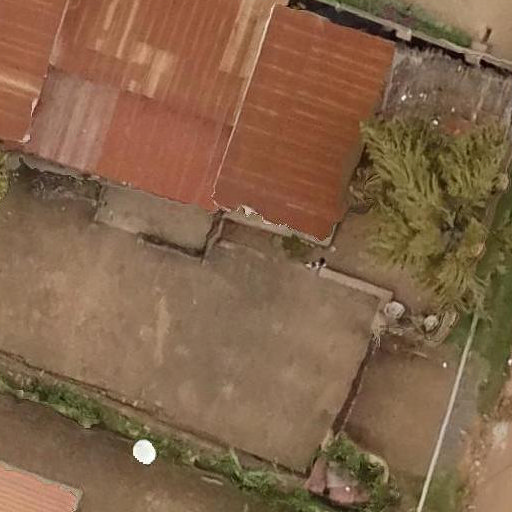

1

In [44]:
display(Image.fromarray(images[2001]), Image.LANCZOS)

In [47]:
path = '../../data/clean/train/kam/'
prefix = 'kam_train'

for i, image in enumerate(images):
    
    np.save(path + prefix + '_' + str(i) + '.npy', image)